In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('/home/bee/Downloads/test.jpg')
img.shape

(4160, 3120, 3)

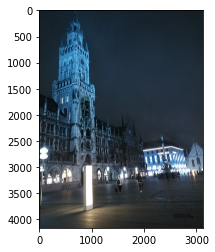

In [3]:
plt.imshow(img)
plt.show()

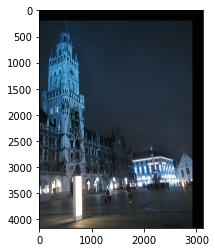

In [4]:
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

# -x --> Left
# -y --> Up
# x --> Right
# y --> Down

translated = translate(img, -200, 200)
plt.imshow(translated)
plt.show()

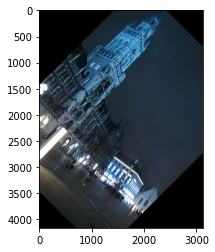

In [5]:
def rotate(img, angle, rotPoint=None):
    (height,width) = img.shape[:2]

    if rotPoint is None:
        rotPoint = (width//2,height//2)
    
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width,height)

    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, -45)
plt.imshow(rotated)
plt.show()


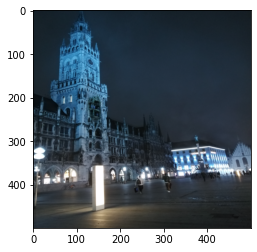

In [6]:
resized = cv.resize(img, (500,500), interpolation=cv.INTER_AREA)
plt.imshow(resized)
plt.show()

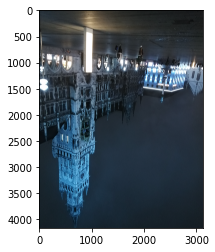

In [7]:

# Flipping
flip = cv.flip(img, 0)
plt.imshow(flip)
plt.show()



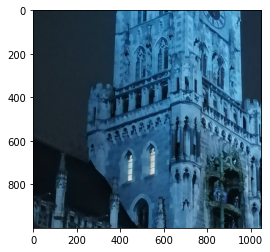

In [8]:
# Cropping
cropped = img[1000:2000, 0:1050]
plt.imshow(cropped)
plt.show()


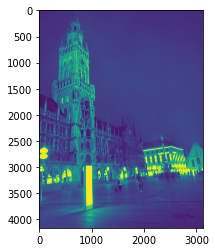

In [9]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

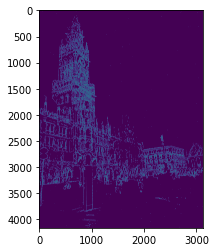

In [10]:
canny = cv.Canny(img, 50,90)
plt.imshow(canny)
plt.show()

In [11]:
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

13826 contour(s) found!


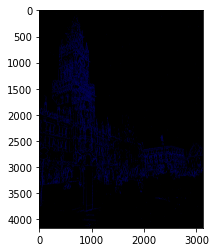

In [12]:
blank = np.zeros(img.shape, dtype='uint8')

cv.drawContours(blank, contours, -1, (0,0,255), 1)
plt.imshow(blank)
plt.show()

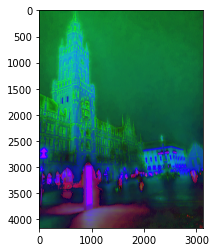

In [13]:
# BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.imshow(hsv)
plt.show()


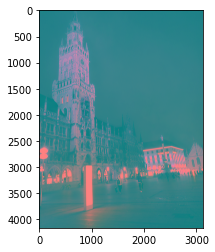

In [14]:
# BGR to L*a*b
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

plt.imshow(lab)
plt.show()


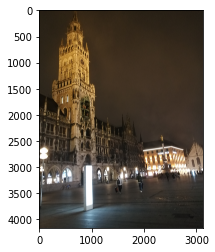

In [15]:
# BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(rgb)
plt.show()


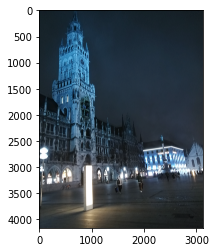

In [16]:
# HSV to BGR
lab_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)

plt.imshow(lab_bgr)
plt.show()

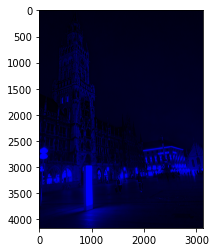

In [17]:

blank = np.zeros(img.shape[:2], dtype='uint8')

b,g,r = cv.split(img)

blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])

blue_rgb = cv.cvtColor(blue, cv.COLOR_BGR2RGB)
plt.imshow(blue_rgb)
plt.show()





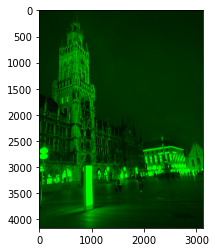

In [18]:
green_rgb = cv.cvtColor(green, cv.COLOR_BGR2RGB)
plt.imshow(green_rgb)
plt.show()

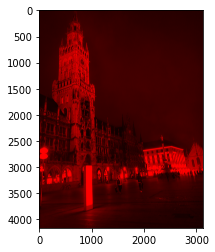

In [19]:
red_rgb = cv.cvtColor(red, cv.COLOR_BGR2RGB)
plt.imshow(red_rgb)
plt.show()

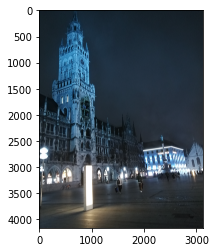

In [20]:
# Averaging
average = cv.blur(img, (3,3))
plt.imshow(average)
plt.show()


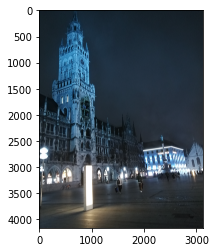

In [21]:
# Gaussian Blur
gauss = cv.GaussianBlur(img, (3,3), 0)
plt.imshow(average)
plt.show()

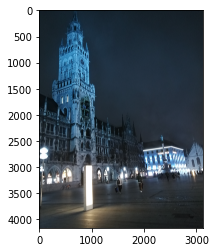

In [22]:
# Median Blur
median = cv.medianBlur(img, 3)
plt.imshow(average)
plt.show()


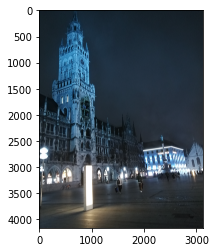

In [23]:
# Bilateral
bilateral = cv.bilateralFilter(img, 10, 35, 25)
plt.imshow(average)
plt.show()

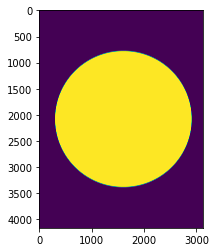

In [24]:
blank = np.zeros((img.shape[0],img.shape[1]), dtype='uint8')

circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45,img.shape[0]//2), 1300, 255, -1)

plt.imshow(circle)
plt.show()


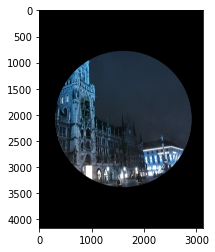

In [25]:

masked = cv.bitwise_and(img,img,mask=circle)
plt.imshow(masked)
plt.show()

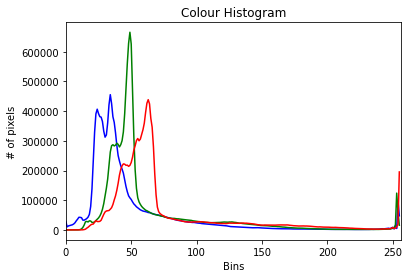

In [26]:
blank = np.zeros(img.shape[:2], dtype='uint8')

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gray)

mask = cv.circle(blank, (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)

masked = cv.bitwise_and(img,img,mask=mask)

plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.show()


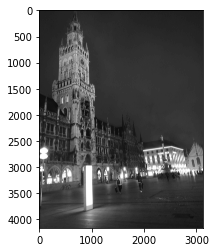

In [27]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()



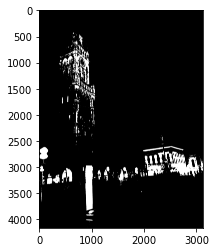

In [28]:
# Simple Thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY )
plt.imshow(thresh, cmap='gray')



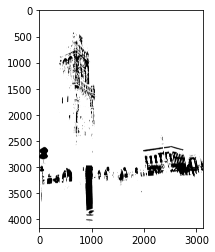

In [29]:
threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV )
plt.imshow(thresh_inv,cmap='gray')
plt.show()



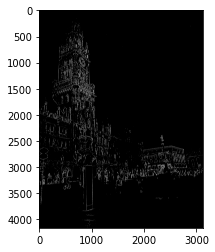

In [30]:
# Adaptive Thresholding
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 9)
plt.imshow(adaptive_thresh, cmap='gray')

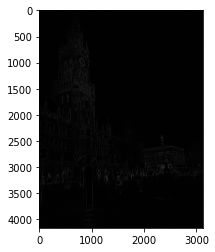

In [31]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.imshow(lap, cmap='gray')
plt.show()



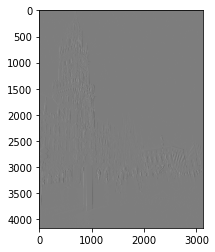

In [32]:
# Sobel 
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

plt.imshow(sobelx, cmap='gray')
plt.show()


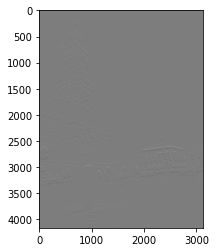

In [33]:
plt.imshow(sobely, cmap='gray')
plt.show()


/home/bee/.local/lib/python3.6/site-packages/matplotlib/image.py:468: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


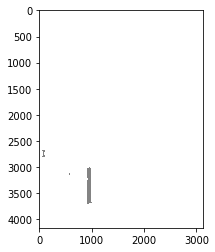

In [34]:
plt.imshow(combined_sobel, cmap='gray')
plt.show()



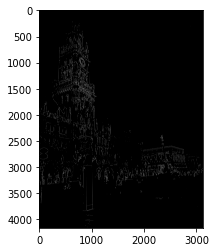

In [35]:


canny = cv.Canny(gray, 150, 175)
plt.imshow(canny, cmap='gray')

Number of faces found = 1


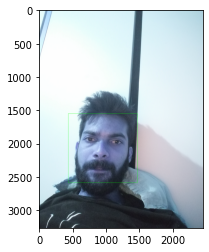

In [36]:
img = cv.imread('/home/bee/Downloads/sajal.jpg')


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

haar_cascade = cv.CascadeClassifier('haar_faces.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

print(f'Number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

plt.imshow(img)
plt.show()